In [184]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import shapiro
import numpy as np

In [185]:
df=pd.read_excel(r'C:\Users\LENOVO\Downloads\varibles data 1995.xlsx')

In [186]:
df.columns

Index(['YEAR', ' NET X/GDP', 'TRADE OPENESS/GDP', 'CUSTOM/GDP', 'GDP(%)',
       'Unnamed: 5', 'YEAR.1', 'GDP', 'CUSTOM/GDP.1', 'TRADE OPENESS/GDP.1',
       'NET X /GDP', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

REMOVE THE UNNECESSARY COLUMNS

In [187]:
df.isnull().sum()

YEAR                   10
 NET X/GDP             10
TRADE OPENESS/GDP      10
CUSTOM/GDP             10
GDP(%)                 10
Unnamed: 5             31
YEAR.1                  1
GDP                     1
CUSTOM/GDP.1            1
TRADE OPENESS/GDP.1     1
NET X /GDP              1
Unnamed: 11            29
Unnamed: 12             1
Unnamed: 13             1
Unnamed: 14            30
dtype: int64

In [188]:
df.head(31)

,YEAR,NET X/GDP,TRADE OPENESS/GDP,CUSTOM/GDP,GDP(%),Unnamed: 5,YEAR.1,GDP,CUSTOM/GDP.1,TRADE OPENESS/GDP.1,NET X /GDP,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,2004.0,-0.06256,59.477003,1.662148,5.104300,NaN,1995.0,0.044062,3.700000,71.745742,-6.56,change in percentage,NaN,-6.56,NaN
1,2005.0,-0.07461,64.478866,1.440286,5.104300,NaN,1996.0,0.041468,3.400000,57.312111,-6.91,0.01,4.406217,-6.91,NaN
2,2006.0,-0.09267,55.236485,1.428365,6.472494,NaN,1997.0,0.044062,2.400000,54.057117,-8.68,NaN,4.146839,-8.68,NaN
3,2007.0,-0.06256,53.894789,0.960674,6.850730,NaN,1998.0,0.041468,1.800000,48.897242,−8.56,NaN,0.474902,−8.56,NaN
4,2008.0,-0.07461,57.578599,1.393120,0.232283,NaN,1999.0,0.004749,1.900000,48.192275,−6.53,NaN,3.290214,−6.53,NaN
5,2009.0,-0.09267,45.945192,1.029667,3.306940,NaN,2000.0,0.032902,1.600000,53.309044,−10.13,NaN,2.305389,−10.13,NaN
6,2010.0,-0.06256,50.394287,1.147175,8.058474,NaN,2001.0,0.023054,1.400000,55.946836,−10.08,NaN,0.599695,−10.08,0.01
7,2011.0,-0.07461,58.402206,1.106827,5.121106,NaN,2002.0,0.005997,1.500000,55.172672,−5.38,NaN,3.779906,−5.38,NaN
8,2012.0,-0.09267,51.623692,1.084743,4.568680,NaN,2003.0,2.932476,1.600000,54.132266,−5.96,NaN,0.546860,−5.96,NaN
9,2013.0,-0.06256,47.464643,1.085411,3.797848,NaN,2004.0,5.104300,1.662148,59.477003,-6.256,NaN,2.932476,-6.256,NaN


In [189]:
fake_columns=df.iloc[:,0:6]
fake_columns

,YEAR,NET X/GDP,TRADE OPENESS/GDP,CUSTOM/GDP,GDP(%),Unnamed: 5
0,2004.0,-0.06256,59.477003,1.662148,5.104300,NaN
1,2005.0,-0.07461,64.478866,1.440286,5.104300,NaN
2,2006.0,-0.09267,55.236485,1.428365,6.472494,NaN
3,2007.0,-0.06256,53.894789,0.960674,6.850730,NaN
4,2008.0,-0.07461,57.578599,1.393120,0.232283,NaN
5,2009.0,-0.09267,45.945192,1.029667,3.306940,NaN
6,2010.0,-0.06256,50.394287,1.147175,8.058474,NaN
7,2011.0,-0.07461,58.402206,1.106827,5.121106,NaN
8,2012.0,-0.09267,51.623692,1.084743,4.568680,NaN
9,2013.0,-0.06256,47.464643,1.085411,3.797848,NaN


In [190]:
df.drop(columns=fake_columns,inplace=True)

In [191]:
df.head(31)

,YEAR.1,GDP,CUSTOM/GDP.1,TRADE OPENESS/GDP.1,NET X /GDP,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,1995.0,0.044062,3.700000,71.745742,-6.56,change in percentage,NaN,-6.56,NaN
1,1996.0,0.041468,3.400000,57.312111,-6.91,0.01,4.406217,-6.91,NaN
2,1997.0,0.044062,2.400000,54.057117,-8.68,NaN,4.146839,-8.68,NaN
3,1998.0,0.041468,1.800000,48.897242,−8.56,NaN,0.474902,−8.56,NaN
4,1999.0,0.004749,1.900000,48.192275,−6.53,NaN,3.290214,−6.53,NaN
5,2000.0,0.032902,1.600000,53.309044,−10.13,NaN,2.305389,−10.13,NaN
6,2001.0,0.023054,1.400000,55.946836,−10.08,NaN,0.599695,−10.08,0.01
7,2002.0,0.005997,1.500000,55.172672,−5.38,NaN,3.779906,−5.38,NaN
8,2003.0,2.932476,1.600000,54.132266,−5.96,NaN,0.546860,−5.96,NaN
9,2004.0,5.104300,1.662148,59.477003,-6.256,NaN,2.932476,-6.256,NaN


In [192]:
last_fake_columns=df.iloc[:,5:9]
df.drop(columns=last_fake_columns,inplace=True)

In [193]:
#remove the last emptry row
df.dropna(inplace=True)

RENAME THE COLUMNS

In [194]:
df.columns

Index(['YEAR.1', 'GDP', 'CUSTOM/GDP.1', 'TRADE OPENESS/GDP.1', 'NET X /GDP'], dtype='object')

In [195]:
df.rename(columns={'YEAR.1': 'YEAR','CUSTOM/GDP.1': 'CUSTOM/GDP','TRADE OPENESS/GDP.1': 'TRADE OPENESS/GDP'}, inplace=True)

In [196]:
df.columns

Index(['YEAR', 'GDP', 'CUSTOM/GDP', 'TRADE OPENESS/GDP', 'NET X /GDP'], dtype='object')

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               30 non-null     float64
 1   GDP                30 non-null     float64
 2   CUSTOM/GDP         30 non-null     float64
 3   TRADE OPENESS/GDP  30 non-null     float64
 4   NET X /GDP         30 non-null     object 
dtypes: float64(4), object(1)
memory usage: 1.4+ KB


In [198]:


# Replace Unicode minus sign with ASCII minus
df['NET X /GDP'] = df['NET X /GDP'].astype(str).str.replace('−', '-', regex=False)
# Now convert to float
df['NET X /GDP'] = df['NET X /GDP'].astype(float)


PERFORM Normality Test-Check if your data (especially residuals in regression) follow a normal distribution

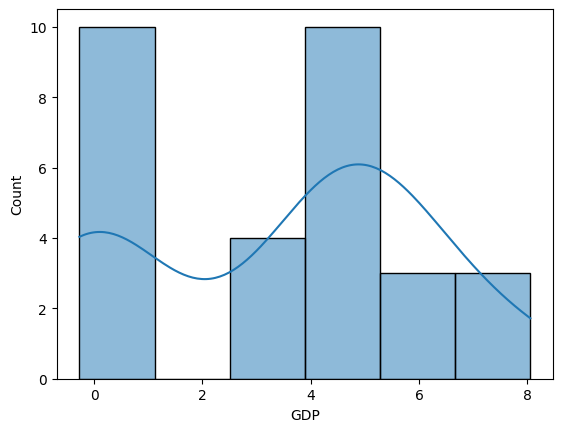

In [199]:
sns.histplot(df['GDP'],kde=True)
plt.show()

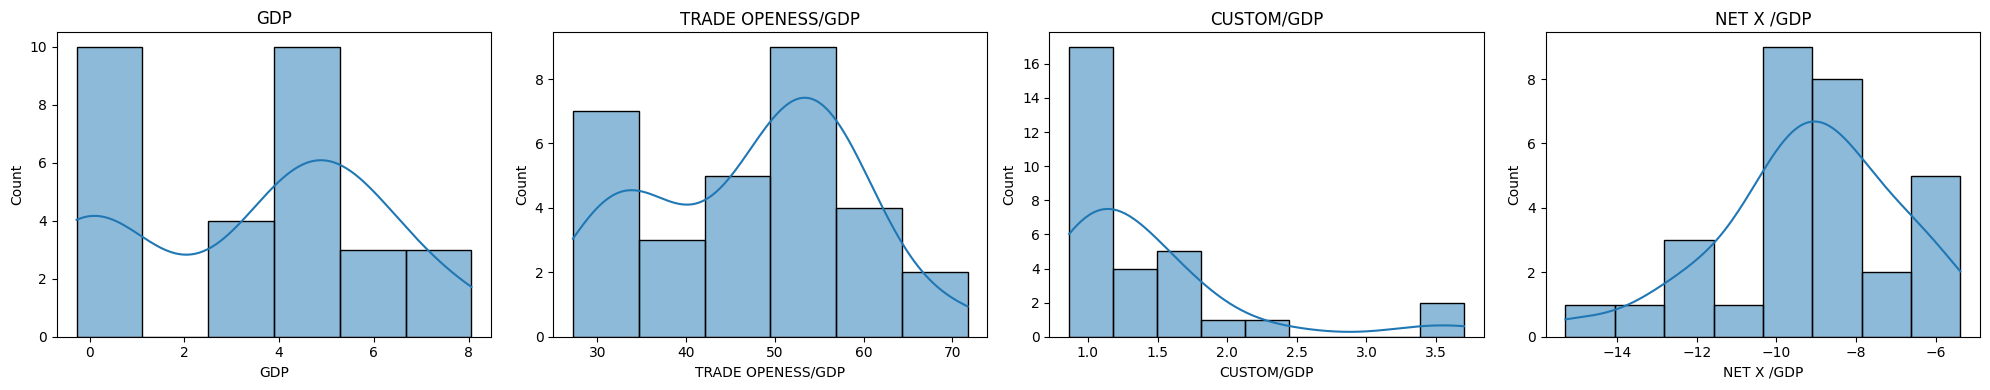

In [200]:


columns_to_plot = ['GDP', 'TRADE OPENESS/GDP', 'CUSTOM/GDP','NET X /GDP']  

fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(5 * len(columns_to_plot), 4))
for ax, col in zip(axes, columns_to_plot):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()



In [201]:

for column in df.columns:
    # Only test numerical columns, as non-numerical data cannot be normal
    if pd.api.types.is_numeric_dtype(df[column]):
        # Perform the Shapiro-Wilk test on the current column (Series)
        stat, p_value = shapiro(df[column].dropna()) 

        print(f"--- Column: {column} ---")
        if p_value < 0.05:
            print(f"P-value: {p_value:.4f} -> REJECT H0. Data is NOT normal.")
        else:
            print(f"P-value: {p_value:.4f} -> Fail to Reject H0. Data IS normal.")

--- Column: YEAR ---
P-value: 0.2662 -> Fail to Reject H0. Data IS normal.
--- Column: GDP ---
P-value: 0.0016 -> REJECT H0. Data is NOT normal.
--- Column: CUSTOM/GDP ---
P-value: 0.0000 -> REJECT H0. Data is NOT normal.
--- Column: TRADE OPENESS/GDP ---
P-value: 0.0967 -> Fail to Reject H0. Data IS normal.
--- Column: NET X /GDP ---
P-value: 0.3588 -> Fail to Reject H0. Data IS normal.


Correlation Test-Measure the relationship between variables

<Axes: >

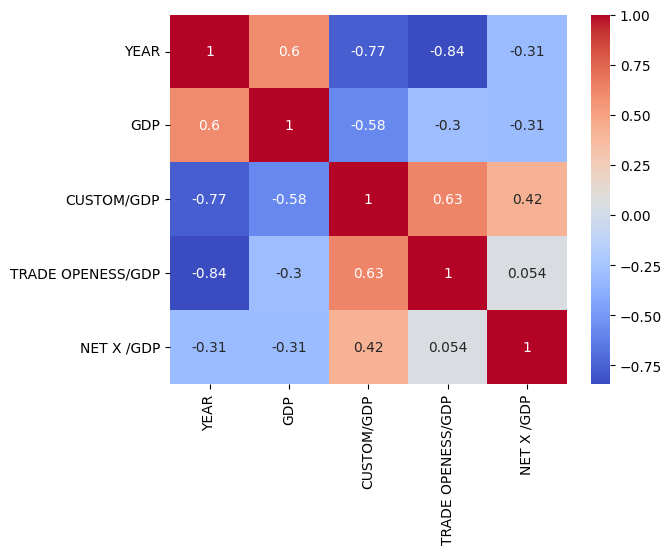

In [202]:
corr=df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

Multicollinearity Test-
Detect if independent variables are highly correlated — which can distort regression coefficients

Variance Inflation Factor (VIF)

𝑉
𝐼
𝐹
>
10
VIF>10: strong multicollinearity

5
<
𝑉
𝐼
𝐹
<
10
5<VIF<10: moderate

𝑉
𝐼
𝐹
<
5
VIF<5: acceptable

In [203]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[['YEAR','GDP', 'TRADE OPENESS/GDP', 'CUSTOM/GDP','NET X /GDP']]
X = add_constant(X)

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

             Feature            VIF
0              const  444540.745517
1               YEAR       8.098380
2                GDP       2.161986
3  TRADE OPENESS/GDP       5.502270
4         CUSTOM/GDP       2.897361
5         NET X /GDP       1.501148


Autocorrelation Test

Check if residuals are correlated across time .
If residuals are correlated, model assumptions are violated.

Durbin–Watson test (from regression output)

Range: 0–4

~2 → no autocorrelation

<2 → positive autocorrelation

2 → negative autocorrelation

In [204]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox

# And assuming the GDP column is actually the GDP Growth Rate (%)
# 1. Set 'YEAR' as the index and ensure it's a datetime object
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')
df = df.set_index('YEAR')

In [205]:

# 2. Select the Independent (Predictor) Variables (X)
# We exclude the two variables we want to model, GDP and NET X./GDP
X = df['CUSTOM/GDP']

# 3. Add a constant term for the regression intercept
X = sm.add_constant(X)

# 4. Select the Dependent Variable (Y) you want to test
Y = df['GDP']  # Assuming we are testing the residuals of a GDP growth model

In [206]:

model = sm.OLS(Y, X).fit()
# The Durbin-Watson test statistic is in the summary output
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     14.06
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           0.000820
Time:                        13:11:17   Log-Likelihood:                -65.469
No. Observations:                  30   AIC:                             134.9
Df Residuals:                      28   BIC:                             137.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6622      0.953      6.988      0.0